In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_regression, make_classification, make_blobs
import plotly.express as px


In [2]:
reg_features,reg_target,reg_coefficients = make_regression(n_samples = 100,
                                               n_features = 3,
                                               n_informative = 3,
                                               n_targets =1,
                                               noise = 0.0,
                                               coef = True,
                                               random_state = 1)

In [3]:
reg_coefficients

array([44.19042807, 98.97517077, 58.15774073])

In [4]:
cls_features,cls_target = make_classification(n_samples = 100,
                                      n_features = 3,
                                      n_informative = 3,
                                      n_redundant = 0,  ##(correlated columns)
                                      n_classes = 2,
                                      weights = [.25,.75],
                                      random_state = 1,)
                                      

In [5]:
type(cls_features)

numpy.ndarray

In [6]:
cls_target.shape

(100,)

In [7]:
data = np.c_[cls_features,cls_target]

In [8]:
cls_df = pd.DataFrame(data)

In [9]:
cls_df

,0,1,2,3
0,1.063548,-1.426322,1.021632,1.0
1,0.231570,1.495353,0.332516,0.0
2,0.159730,0.835335,-0.408696,0.0
3,-0.706121,-1.032810,1.394780,1.0
4,0.844490,-0.619972,1.087911,1.0
...,...,...,...,...
95,1.106411,-1.615516,1.603296,1.0
96,-2.438623,-1.784630,0.500376,1.0
97,-1.304690,-1.652926,0.992340,1.0
98,1.190208,-0.961064,0.292125,1.0


In [10]:
clu_features,clu_clusters = make_blobs(n_samples = 100, centers = 3, n_features = 2, random_state = 0)

In [11]:
clu_df = pd.DataFrame(data = np.c_[clu_features,clu_clusters], columns = ['feature1','feature2','cluster_id'])

In [12]:
clu_df

,feature1,feature2,cluster_id
0,2.631858,0.689365,1.0
1,0.080804,4.690690,0.0
2,3.002519,0.742654,1.0
3,-0.637628,4.091047,0.0
4,-0.072283,2.883769,0.0
...,...,...,...
95,-0.338874,3.234825,2.0
96,1.289338,3.449692,0.0
97,1.840706,3.561622,0.0
98,-0.901673,1.315825,2.0


<Axes: xlabel='feature1', ylabel='feature2'>

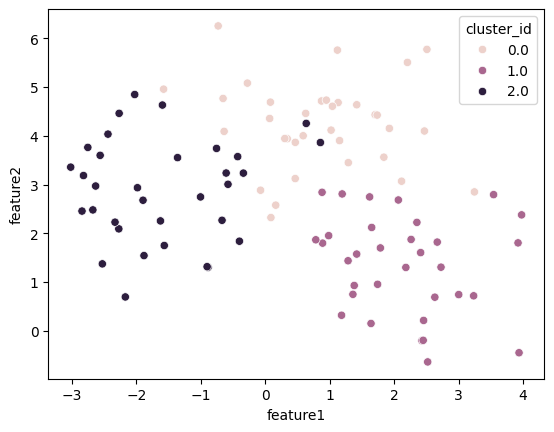

In [13]:
sns.scatterplot(clu_df, x='feature1',y = 'feature2',hue = 'cluster_id', 
               )

In [14]:
import sqlite3

In [15]:
conn = sqlite3.connect('example.db')

In [16]:
cursor= conn.cursor()

In [17]:
cursor.execute('''CREATE TABLE EMPLOYEE(
    FIRST_NAME CHAR(20) NOT NULL,
    LAST_NAME CHAR(20),
    AGE INT NOT NULL,
    SEX CHAR(1),
    INCOME FLOAT)''')
conn.commit()

OperationalError: table EMPLOYEE already exists

In [18]:
cursor.execute('''INSERT INTO EMPLOYEE VALUES
                  ('Ram','Shrestha',24,'M',1200),
                  ('Sita','Shrestha',24,'F',12300),
                  ('Aanal','Patel',34,'M',40000),
                  ('Jay','Saravanan',24,'M',12000),
                  ('Ernie','Samosa',10,'M',1200)''')
                  

In [19]:
data_db = [('Ram','Shrestha',24,'M',1200),
                  ('Sita','Shrestha',24,'F',12300),
                  ('Aanal','Patel',34,'M',40000),
                  ('Jay','Saravanan',24,'M',12000),
                  ('Ernie','Samosa',10,'M',1200)]

In [25]:
cursor.executemany('''INSERT INTO EMPLOYEE VALUES (?,?,?,?,?)''',data_db)

In [26]:
conn.commit()

In [27]:
cursor.execute('''SELECT * FROM EMPLOYEE''')
data_row = cursor.fetchone()
print(data_row)


('Ram', 'Shrestha', 24, 'M', 1200.0)


In [28]:
cursor.execute('''SELECT * FROM EMPLOYEE''')
row_three = cursor.fetchmany(3)
for row in row_three:
    print(row)


('Ram', 'Shrestha', 24, 'M', 1200.0)
('Sita', 'Shrestha', 24, 'F', 12300.0)
('Aanal', 'Patel', 34, 'M', 40000.0)


In [29]:
data_table = cursor.fetchall() #this resets the cursor
for row in data_table:
    print(row)

('Jay', 'Saravanan', 24, 'M', 12000.0)
('Ernie', 'Samosa', 10, 'M', 1200.0)
('Ram', 'Shrestha', 24, 'M', 1200.0)
('Sita', 'Shrestha', 24, 'F', 12300.0)
('Aanal', 'Patel', 34, 'M', 40000.0)
('Jay', 'Saravanan', 24, 'M', 12000.0)
('Ernie', 'Samosa', 10, 'M', 1200.0)
('Ram', 'Shrestha', 24, 'M', 1200.0)
('Sita', 'Shrestha', 24, 'F', 12300.0)
('Aanal', 'Patel', 34, 'M', 40000.0)
('Jay', 'Saravanan', 24, 'M', 12000.0)
('Ernie', 'Samosa', 10, 'M', 1200.0)
('Ram', 'Shrestha', 24, 'M', 1200.0)
('Sita', 'Shrestha', 24, 'F', 12300.0)
('Aanal', 'Patel', 34, 'M', 40000.0)
('Jay', 'Saravanan', 24, 'M', 12000.0)
('Ernie', 'Samosa', 10, 'M', 1200.0)
('Ram', 'Shrestha', 24, 'M', 1200.0)
('Sita', 'Shrestha', 24, 'F', 12300.0)
('Aanal', 'Patel', 34, 'M', 40000.0)
('Jay', 'Saravanan', 24, 'M', 12000.0)
('Ernie', 'Samosa', 10, 'M', 1200.0)


In [32]:
cursor.execute('''UPDATE EMPLOYEE SET AGE = AGE+1 WHERE SEX = "M"''')
conn.commit()

In [33]:
cursor.execute('''SELECT * FROM EMPLOYEE''')
row_three = cursor.fetchmany(20)
for row in row_three:
    print(row)

('Ram', 'Shrestha', 25, 'M', 1200.0)
('Sita', 'Shrestha', 24, 'F', 12300.0)
('Aanal', 'Patel', 35, 'M', 40000.0)
('Jay', 'Saravanan', 25, 'M', 12000.0)
('Ernie', 'Samosa', 11, 'M', 1200.0)
('Ram', 'Shrestha', 25, 'M', 1200.0)
('Sita', 'Shrestha', 24, 'F', 12300.0)
('Aanal', 'Patel', 35, 'M', 40000.0)
('Jay', 'Saravanan', 25, 'M', 12000.0)
('Ernie', 'Samosa', 11, 'M', 1200.0)
('Ram', 'Shrestha', 25, 'M', 1200.0)
('Sita', 'Shrestha', 24, 'F', 12300.0)
('Aanal', 'Patel', 35, 'M', 40000.0)
('Jay', 'Saravanan', 25, 'M', 12000.0)
('Ernie', 'Samosa', 11, 'M', 1200.0)
('Ram', 'Shrestha', 25, 'M', 1200.0)
('Sita', 'Shrestha', 24, 'F', 12300.0)
('Aanal', 'Patel', 35, 'M', 40000.0)
('Jay', 'Saravanan', 25, 'M', 12000.0)
('Ernie', 'Samosa', 11, 'M', 1200.0)


In [36]:
cursor.execute('''UPDATE EMPLOYEE SET SEX = "F" WHERE FIRST_NAME = "Aanal"''')
conn.commit()

In [37]:
cursor.execute('''SELECT * FROM EMPLOYEE''')
rows = cursor.fetchall()
for row in rows:
    print(row)

('Ram', 'Shrestha', 25, 'M', 1200.0)
('Sita', 'Shrestha', 24, 'F', 12300.0)
('Aanal', 'Patel', 35, 'F', 40000.0)
('Jay', 'Saravanan', 25, 'M', 12000.0)
('Ernie', 'Samosa', 11, 'M', 1200.0)
('Ram', 'Shrestha', 25, 'M', 1200.0)
('Sita', 'Shrestha', 24, 'F', 12300.0)
('Aanal', 'Patel', 35, 'F', 40000.0)
('Jay', 'Saravanan', 25, 'M', 12000.0)
('Ernie', 'Samosa', 11, 'M', 1200.0)
('Ram', 'Shrestha', 25, 'M', 1200.0)
('Sita', 'Shrestha', 24, 'F', 12300.0)
('Aanal', 'Patel', 35, 'F', 40000.0)
('Jay', 'Saravanan', 25, 'M', 12000.0)
('Ernie', 'Samosa', 11, 'M', 1200.0)
('Ram', 'Shrestha', 25, 'M', 1200.0)
('Sita', 'Shrestha', 24, 'F', 12300.0)
('Aanal', 'Patel', 35, 'F', 40000.0)
('Jay', 'Saravanan', 25, 'M', 12000.0)
('Ernie', 'Samosa', 11, 'M', 1200.0)
('Ram', 'Shrestha', 25, 'M', 1200.0)
('Sita', 'Shrestha', 24, 'F', 12300.0)
('Aanal', 'Patel', 35, 'F', 40000.0)
('Jay', 'Saravanan', 25, 'M', 12000.0)
('Ernie', 'Samosa', 11, 'M', 1200.0)


In [39]:
cursor.execute('''ALTER TABLE EMPLOYEE RENAME COLUMN SEX TO GENDER''')
conn.commit()

In [42]:
cursor.execute('''DELETE  FROM EMPLOYEE WHERE AGE >24''')
conn.commit()

In [43]:
cursor.execute('''SELECT * FROM EMPLOYEE''')
rows = cursor.fetchall()
for row in rows:
    print(row)

('Sita', 'Shrestha', 24, 'F', 12300.0)
('Ernie', 'Samosa', 11, 'M', 1200.0)
('Sita', 'Shrestha', 24, 'F', 12300.0)
('Ernie', 'Samosa', 11, 'M', 1200.0)
('Sita', 'Shrestha', 24, 'F', 12300.0)
('Ernie', 'Samosa', 11, 'M', 1200.0)
('Sita', 'Shrestha', 24, 'F', 12300.0)
('Ernie', 'Samosa', 11, 'M', 1200.0)
('Sita', 'Shrestha', 24, 'F', 12300.0)
('Ernie', 'Samosa', 11, 'M', 1200.0)


In [44]:
cursor.execute('''ALTER TABLE EMPLOYEE DROP GENDER''')
conn.commit()

In [45]:
cursor.execute('''SELECT * FROM EMPLOYEE''')
rows = cursor.fetchall()
for row in rows:
    print(row)

('Sita', 'Shrestha', 24, 12300.0)
('Ernie', 'Samosa', 11, 1200.0)
('Sita', 'Shrestha', 24, 12300.0)
('Ernie', 'Samosa', 11, 1200.0)
('Sita', 'Shrestha', 24, 12300.0)
('Ernie', 'Samosa', 11, 1200.0)
('Sita', 'Shrestha', 24, 12300.0)
('Ernie', 'Samosa', 11, 1200.0)
('Sita', 'Shrestha', 24, 12300.0)
('Ernie', 'Samosa', 11, 1200.0)


In [47]:
df = pd.read_sql('''SELECT * FROM EMPLOYEE''',conn)

In [48]:
df

,FIRST_NAME,LAST_NAME,AGE,INCOME
0,Sita,Shrestha,24,12300.0
1,Ernie,Samosa,11,1200.0
2,Sita,Shrestha,24,12300.0
3,Ernie,Samosa,11,1200.0
4,Sita,Shrestha,24,12300.0
5,Ernie,Samosa,11,1200.0
6,Sita,Shrestha,24,12300.0
7,Ernie,Samosa,11,1200.0
8,Sita,Shrestha,24,12300.0
9,Ernie,Samosa,11,1200.0
